# Exports Classification


![](ex2.jpg)

### Contents
- Build models
        - Linear Regression
        - Decision Tree Regression
        - Random Forest Regression
        - Lasso Regression
        - Ridge Regression
        - MLP Regression
        - XgBoost Regression
        - Gradient Boosting Regression
        - Support Vector Regression


In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
# Loading Data
data = pd.read_csv('./DataSets/canada_per_capita.csv')
data.head()

,year,per capita income (US$),Unnamed: 2
0,1970,3399.299037,NaN
1,1971,3768.297935,NaN
2,1972,4251.175484,NaN
3,1973,4804.463248,NaN
4,1974,5576.514583,NaN


In [3]:
data.corr()

,year,per capita income (US$),Unnamed: 2
year,1.000000,0.943884,NaN
per capita income (US$),0.943884,1.000000,NaN
Unnamed: 2,NaN,NaN,NaN


**Data cleaning and pre-processing**

In [4]:
data.columns

Index(['year', 'per capita income (US$)', 'Unnamed: 2'], dtype='object')

In [5]:
data.drop(columns=['Unnamed: 2'], inplace = True)

In [6]:
data.rename(columns={"per capita income (US$)": "capita"}, inplace = True)

In [7]:
data.columns

Index(['year', 'capita'], dtype='object')

### Plotting the Year v/s Capita Curve for the dataset

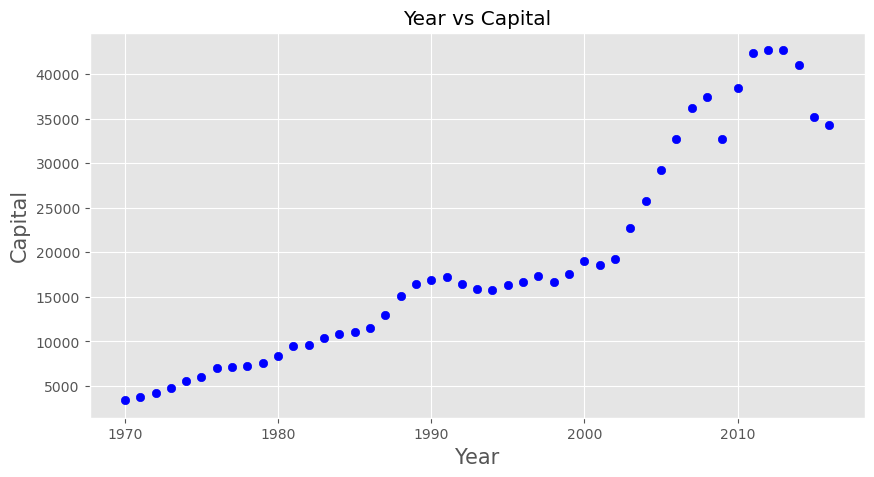

In [8]:
plt.figure(figsize=(10,5))

plt.title('Year vs Capital')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Capital', fontsize=15)
plt.scatter(data.year, data.capita, color='blue')
plt.show()

In [9]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(f'X_train: {X_train.shape}\nX_test: {X_test.shape}\ny_train: {y_train.shape}\ny_test: {y_test.shape}')

X_train: (35, 1)
X_test: (12, 1)
y_train: (35,)
y_test: (12,)


### Simple Linear Regression

In [10]:
from sklearn import metrics

Models, MAE, MSE, R2Score = [], [], [], []


In [11]:
from sklearn.linear_model import LinearRegression


regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

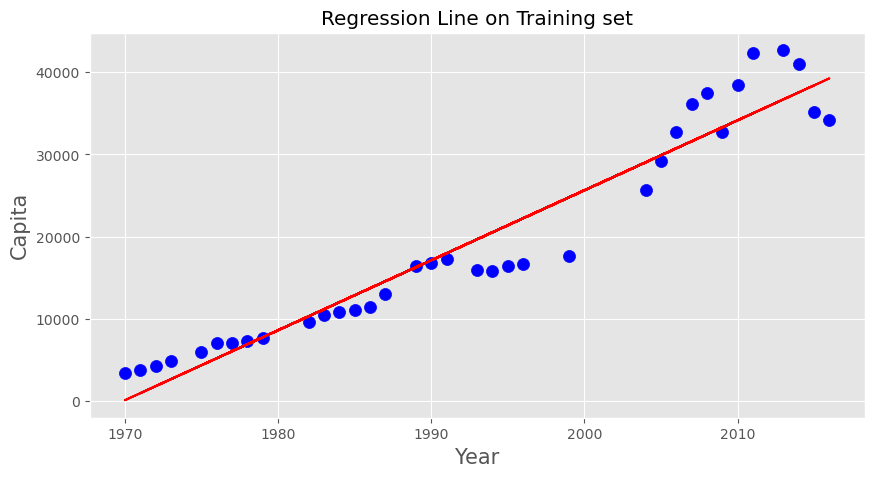

In [12]:
plt.figure(figsize=(10,5))
plt.title('Regression Line on Training set')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Capita', fontsize=15)
plt.scatter(X_train, y_train,s=75, color='blue')
plt.plot(X_train, regr.predict(X_train), color='red')
plt.show()

In [13]:
y_pred = np.round(regr.predict(X_test), decimals=2)
pd.DataFrame({'Height': X_test[:,0], 'Actual Weight': y_test, 'Predicted Weight': y_pred})

,Height,Actual Weight,Predicted Weight
0,1998,16622.671870,23927.34
1,2003,22739.426280,28184.79
2,2000,18987.382410,25630.32
3,1974,5576.514583,3491.57
4,1988,15080.283450,15412.43
5,1981,9434.390652,9452.00
6,2012,42665.255970,35848.21
7,2001,18601.397240,26481.81
8,1992,16412.083090,18818.40
9,1980,8355.968120,8600.51


In [14]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')


Models.append('LinearRegression')
MAE.append(metrics.mean_absolute_error(y_test, y_pred))
MSE.append(metrics.mean_squared_error(y_test, y_pred))
R2Score.append(metrics.r2_score(y_test, y_pred))

Mean Absolute Error(MAE): 4420.1836775833335
Residual Sum of Squares(MSE): 28740341.363502104
R2-Score: 0.642889173207477


### Decision Tree Regressor

In [15]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

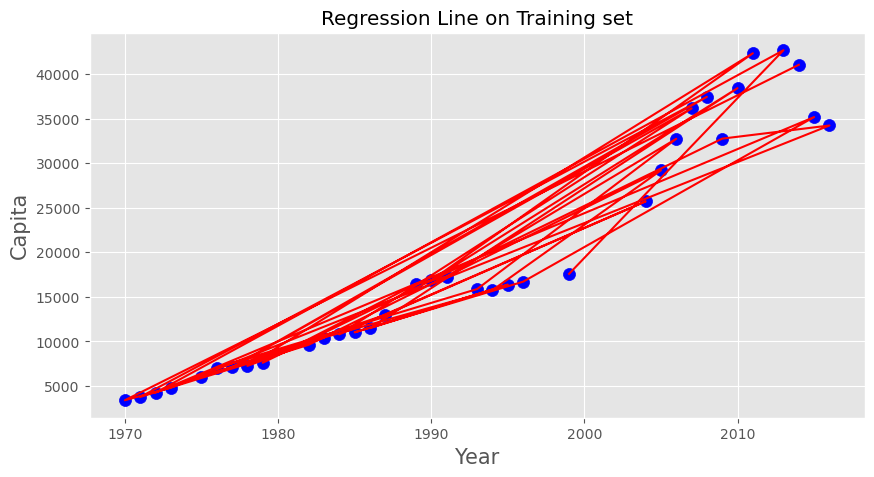

In [16]:
plt.figure(figsize=(10,5))
plt.title('Regression Line on Training set')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Capita', fontsize=15)
plt.scatter(X_train, y_train,s=75, color='blue')
plt.plot(X_train, dtr.predict(X_train), color='red')
plt.show()

In [17]:
y_pred = np.round(dtr.predict(X_test), decimals=2)

In [18]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Models.append('Decision tree Regressior')
MAE.append(metrics.mean_absolute_error(y_test, y_pred))
MSE.append(metrics.mean_squared_error(y_test, y_pred))
R2Score.append(metrics.r2_score(y_test, y_pred))

Mean Absolute Error(MAE): 1538.5760059166666
Residual Sum of Squares(MSE): 5144942.639069844
R2-Score: 0.9360719242544705


### Random Forest Regression 

In [19]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

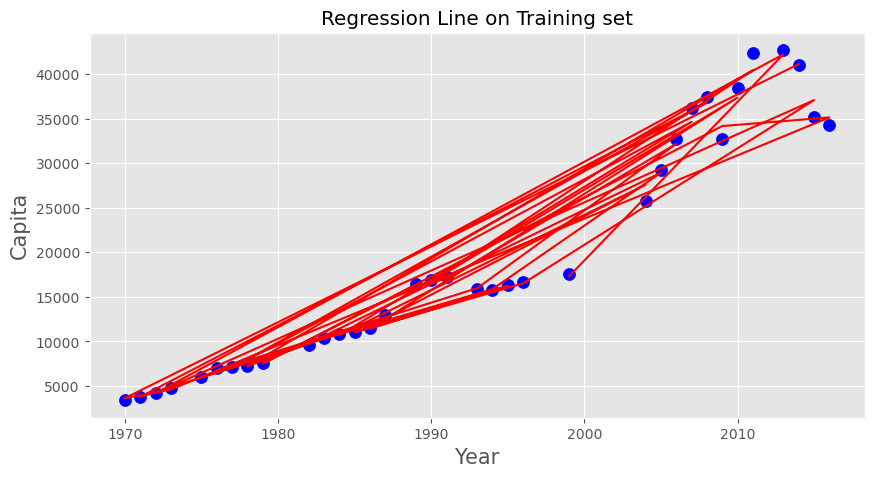

In [20]:
plt.figure(figsize=(10,5))
plt.title('Regression Line on Training set')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Capita', fontsize=15)
plt.scatter(X_train, y_train,s=75, color='blue')
plt.plot(X_train, rfr.predict(X_train), color='red')
plt.show()

In [21]:
y_pred = np.round(rfr.predict(X_test), decimals=2)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Models.append('random forest Regressor')
MAE.append(metrics.mean_absolute_error(y_test, y_pred))
MSE.append(metrics.mean_squared_error(y_test, y_pred))
R2Score.append(metrics.r2_score(y_test, y_pred))

Mean Absolute Error(MAE): 1399.5982412500005
Residual Sum of Squares(MSE): 4129073.2827153862
R2-Score: 0.9486945281815633


### Lasso Regression

In [22]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

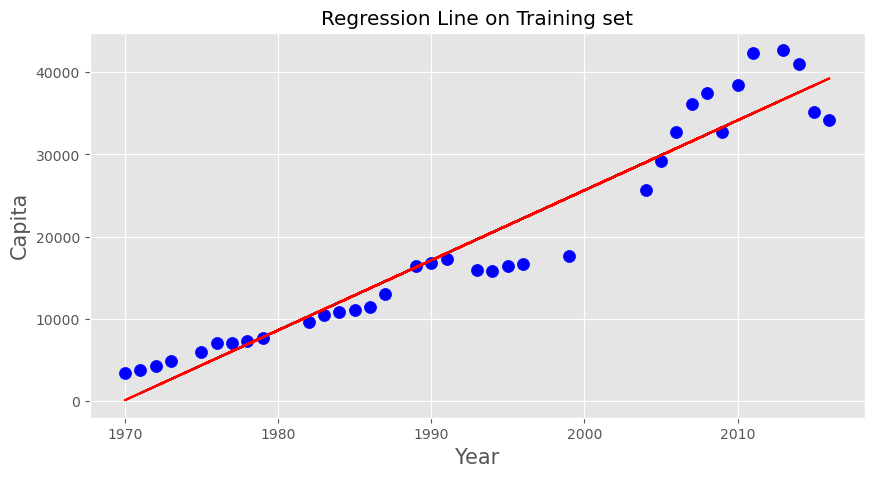

In [23]:
plt.figure(figsize=(10,5))
plt.title('Regression Line on Training set')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Capita', fontsize=15)
plt.scatter(X_train, y_train,s=75, color='blue')
plt.plot(X_train, lasso.predict(X_train), color='red')
plt.show()

In [24]:
y_pred = np.round(lasso.predict(X_test), decimals=2)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Models.append('Lasso Regressor')
MAE.append(metrics.mean_absolute_error(y_test, y_pred))
MSE.append(metrics.mean_squared_error(y_test, y_pred))
R2Score.append(metrics.r2_score(y_test, y_pred))

Mean Absolute Error(MAE): 4420.186177583334
Residual Sum of Squares(MSE): 28740350.240875717
R2-Score: 0.6428890629023769


### Ridge Regression

In [25]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

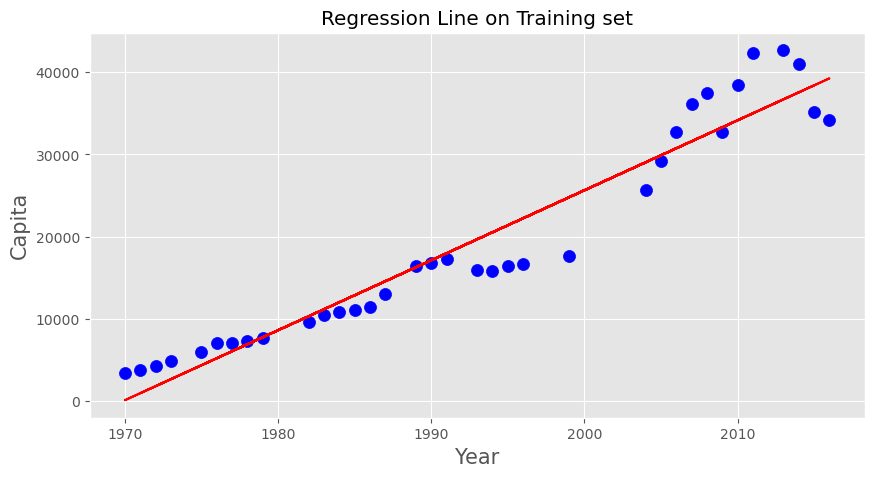

In [26]:
plt.figure(figsize=(10,5))
plt.title('Regression Line on Training set')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Capita', fontsize=15)
plt.scatter(X_train, y_train,s=75, color='blue')
plt.plot(X_train, ridge.predict(X_train), color='red')
plt.show()

In [27]:
y_pred = np.round(ridge.predict(X_test), decimals=2)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Models.append('Ridge Regressor')
MAE.append(metrics.mean_absolute_error(y_test, y_pred))
MSE.append(metrics.mean_squared_error(y_test, y_pred))
R2Score.append(metrics.r2_score(y_test, y_pred))

Mean Absolute Error(MAE): 4420.169510916666
Residual Sum of Squares(MSE): 28739926.596719485
R2-Score: 0.6428943268591609


### XgBoost Regressor 

In [28]:
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

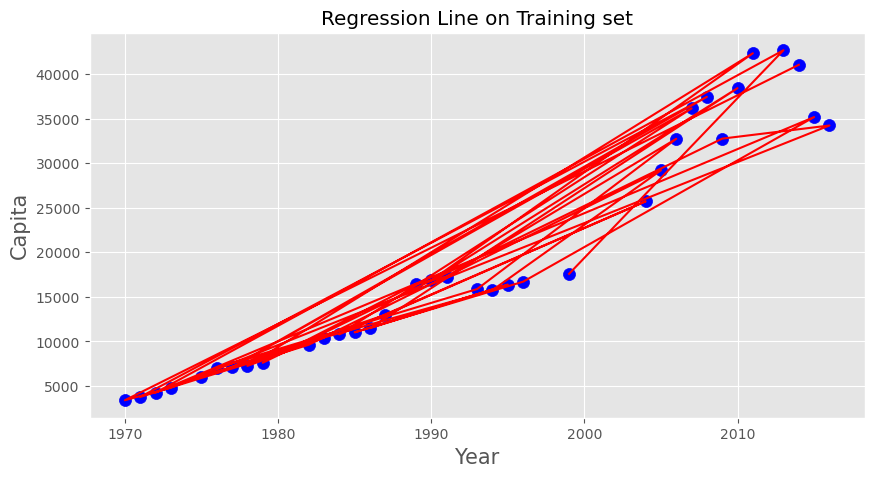

In [29]:
plt.figure(figsize=(10,5))
plt.title('Regression Line on Training set')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Capita', fontsize=15)
plt.scatter(X_train, y_train,s=75, color='blue')
plt.plot(X_train, xgb.predict(X_train), color='red')
plt.show()

In [30]:
y_pred = np.round(xgb.predict(X_test), decimals=2)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Models.append('XGB Regressor')
MAE.append(metrics.mean_absolute_error(y_test, y_pred))
MSE.append(metrics.mean_squared_error(y_test, y_pred))
R2Score.append(metrics.r2_score(y_test, y_pred))

Mean Absolute Error(MAE): 1393.0534367578123
Residual Sum of Squares(MSE): 4845873.510385647
R2-Score: 0.9397879839373301


### MLP Regressor 

In [31]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
mlp.fit(X_train, y_train)

MLPRegressor()

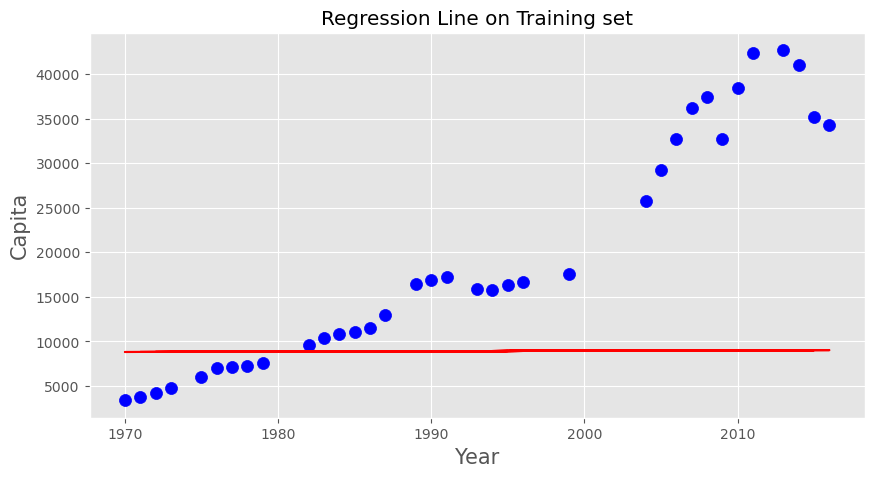

In [32]:
plt.figure(figsize=(10,5))
plt.title('Regression Line on Training set')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Capita', fontsize=15)
plt.scatter(X_train, y_train,s=75, color='blue')
plt.plot(X_train, mlp.predict(X_train), color='red')
plt.show()

In [33]:
y_pred = np.round(mlp.predict(X_test), decimals=2)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Models.append('MLP Regressor')
MAE.append(metrics.mean_absolute_error(y_test, y_pred))
MSE.append(metrics.mean_squared_error(y_test, y_pred))
R2Score.append(metrics.r2_score(y_test, y_pred))

Mean Absolute Error(MAE): 9291.760130749999
Residual Sum of Squares(MSE): 154831825.7571537
R2-Score: -0.923850542017205


### Gradient Boosting Regressor 

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

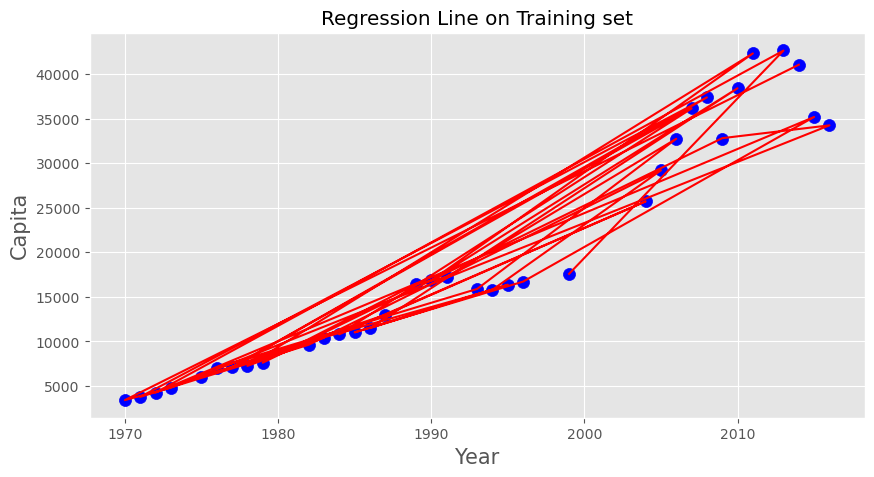

In [35]:
plt.figure(figsize=(10,5))
plt.title('Regression Line on Training set')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Capita', fontsize=15)
plt.scatter(X_train, y_train,s=75, color='blue')
plt.plot(X_train, gb.predict(X_train), color='red')
plt.show()

In [36]:
y_pred = np.round(gb.predict(X_test), decimals=2)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Models.append('Gradient Boost Regressor')
MAE.append(metrics.mean_absolute_error(y_test, y_pred))
MSE.append(metrics.mean_squared_error(y_test, y_pred))
R2Score.append(metrics.r2_score(y_test, y_pred))

Mean Absolute Error(MAE): 1534.3551725833331
Residual Sum of Squares(MSE): 5132058.753013977
R2-Score: 0.9362320119564055


### Support Vector Machine Regressor 

In [37]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train, y_train)

SVR()

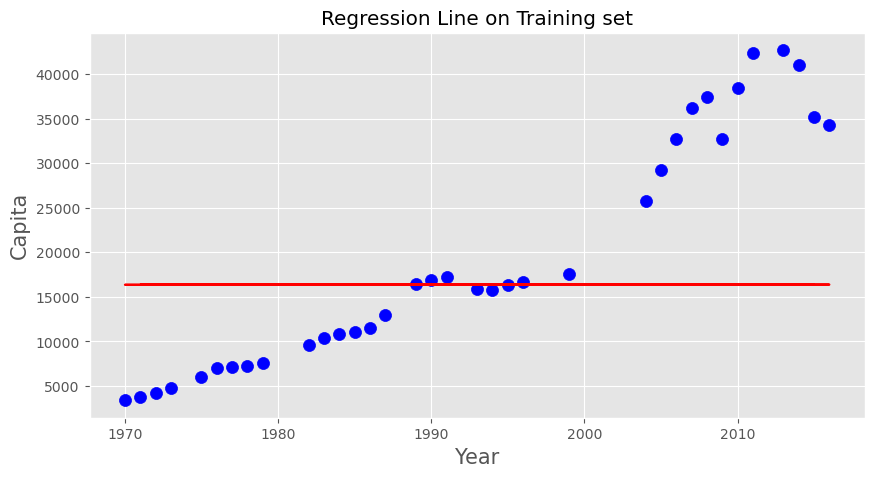

In [38]:
plt.figure(figsize=(10,5))
plt.title('Regression Line on Training set')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Capita', fontsize=15)
plt.scatter(X_train, y_train,s=75, color='blue')
plt.plot(X_train, svm.predict(X_train), color='red')
plt.show()

In [39]:
y_pred = np.round(svm.predict(X_test), decimals=2)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')


Models.append('SVM Regressor')
MAE.append(metrics.mean_absolute_error(y_test, y_pred))
MSE.append(metrics.mean_squared_error(y_test, y_pred))
R2Score.append(metrics.r2_score(y_test, y_pred))

Mean Absolute Error(MAE): 5713.578613749999
Residual Sum of Squares(MSE): 81842468.93126841
R2-Score: -0.01692709133588588


In [40]:
results = pd.DataFrame({"Models": Models, 'MAE':MAE, 'MSE':MSE,'R2Score':R2Score              
                       })
results 

,Models,MAE,MSE,R2Score
0,LinearRegression,4420.183678,2.874034e+07,0.642889
1,Decision tree Regressior,1538.576006,5.144943e+06,0.936072
2,random forest Regressor,1399.598241,4.129073e+06,0.948695
3,Lasso Regressor,4420.186178,2.874035e+07,0.642889
4,Ridge Regressor,4420.169511,2.873993e+07,0.642894
5,XGB Regressor,1393.053437,4.845874e+06,0.939788
6,MLP Regressor,9291.760131,1.548318e+08,-0.923851
7,Gradient Boost Regressor,1534.355173,5.132059e+06,0.936232
8,SVM Regressor,5713.578614,8.184247e+07,-0.016927


**********